In [88]:
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt
import gurobipy
from PIL import Image

# Problem 1

In [6]:
def GetMatrix(links,cities):

    A = np.zeros((len(cities), len(cities)));
    for i in xrange(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i+2]
           
    return A   

I change $profit\_sym$ by $\frac{1}{2}profit\_sym$.

In [67]:
cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg'];

blue = ['Winnipeg','Helena',4,
    'Portland','SaltLakeCity',6,
    'Omaha','Chicago',4,
    'Montreal','NewYork',3,
    'KansasCity','SaintLouis',2,
    'SantaFe','OklahomaCity',3,
    'Atlanta','Miami',5];

blue = GetMatrix(blue,cities);

white = ['Calgary','Winnipeg',6,
    'Chicago','Toronto',4,
    'SaintLouis','Chicago',2,
    'Pittsburgh','NewYork',2,
    'SanFrancisco','SaltLakeCity',5,
    'Phoenix','Denver',5,
    'LittleRock','Nashville',3];

white = GetMatrix(white,cities);

green = ['Portland','SanFrancisco',5,
    'Helena','Denver',4,
    'SaintLouis','Pittsburgh',5,
    'LittleRock','NewOrleans',3,
    'ElPaso','Houston',6];

green = GetMatrix(green,cities);

red = ['Helena','Omaha',5,
    'Denver','OklahomaCity',4,
    'ElPaso','Dallas',4,
    'NewOrleans','Miami',6,
    'NewYork','Boston',2,
    'Duluth','Chicago',3];

red = GetMatrix(red,cities);

purple = ['Helena','SaltLakeCity',3,
    'Denver','Omaha',4,
    'Duluth','Toronto',6,
    'Charleston','Miami',4,
    'SanFrancisco','LosAngeles',3];
purple = GetMatrix(purple,cities);

orange = ['LasVegas','SaltLakeCity',3,
    'Helena','Duluth',6,
    'Chicago','Pittsburgh',3,
    'Denver','KansasCity',4,
    'NewYork','Washington',2,
    'Atlanta','NewOrleans',4];

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
    'Winnipeg','Duluth',4,
    'SaultStMarie','Montreal',5,
    'Nashville','Raleigh',3];

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
    'ElPaso','OklahomaCity',5,
    'Nashville','Pittsburgh',4];

yellow = GetMatrix(yellow,cities);

gray = ['Vancouver','Seattle',1,
    'Portland','Seattle',1,
    'Vancouver','Calgary',3,
    'Seattle','Calgary',4,
    'Calgary','Helena',4,
    'Winnipeg','SaultStMarie',6,
    'Duluth','SaultStMarie',3,
    'SaultStMarie','Toronto',2,
    'Toronto','Montreal',3,
    'Montreal','Boston',2,
    'Toronto','Pittsburgh',2,
    'LasVegas','LosAngeles',2,
    'LosAngeles','Phoenix',3,
    'Phoenix','ElPaso',3,
    'ElPaso','SantaFe',2,
    'Phoenix','SantaFe',3,
    'SantaFe','Denver',2,
    'Duluth','Omaha',2,
    'Omaha','KansasCity',1,
    'KansasCity','OklahomaCity',2,
    'OklahomaCity','Dallas',2,
    'Dallas','Houston',1,
    'Houston','NewOrleans',2,
    'Dallas','LittleRock',2,
    'OklahomaCity','LittleRock',2,
    'LittleRock','SaintLouis',2,
    'SaintLouis','Nashville',2,
    'Nashville','Atlanta',1,
    'Atlanta','Charleston',2,
    'Charleston','Raleigh',2,
    'Atlanta','Raleigh',2,
    'Raleigh','Washington',2,
    'Raleigh','Pittsburgh',2,
    'Washington','Pittsburgh',2];

gray = GetMatrix(gray,cities);

profit = blue*1.0+white*1.5+green*2.0+red*2.0+purple*2.5+orange*1.0+black*1.0+yellow*2.0+gray*1.0;

#TODO: symmetrize the matrix if necessary by uncommenting the next line
profit_sym = .5 * np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities),1))*10;

#TODO put your solution here

It can be easily seen that minus profit can be expressed as the following function of $x_i\in\{0, 1\}$ (depot is in the city $i$):

$$\tilde{\Pi}(x) = \sum_{j=1}^n c_jx_j - \sum_{ij}\pi_{ij}x_j + \sum_{ij}\pi_{ij}\max(0, x_j-x_i) = \sum_{j=1}^n\max\left(0, c_j - \sum_{i=1}^n \pi_{ij}\right)x_j - \sum_{j=1}^n\max\left(0, -c_j + \sum_{i=1}^n \pi_{ij}\right)x_j + \sum_{ij}\pi_{ij}\max(0, x_j-x_i) =$$
.
$$= \sum_{j=1}^n\max\left(0, c_j - \sum_{i=1}^n \pi_{ij}\right)\max(0, x_j - x_s) + \sum_{j=1}^n\max\left(0, -c_j + \sum_{i=1}^n \pi_{ij}\right)\max(0, x_t-x_j) + \sum_{ij}\pi_{ij}\max(0, x_j-x_i) - \sum_{j=1}^n\max\left(0, -c_j + \sum_{i=1}^n \pi_{ij}\right)$$

Here we use the following formulas:

$$x = \max(0, x) - \max(0, -x)$$

$$x = \max(0, x - x_s),\ x_s=1$$

$$1 - x = \max(0, x_t - x)\Rightarrow x = 1 - \max(0, x_t-x),\ x_t=1$$

The last summand of $\tilde{\Pi}(x)$ expression is a constant, so $\tilde{\Pi}(x)$ minimization can be reduced to the minimization of th following function

$$\Pi(x) = \sum_{j=1}^n\max\left(0, c_j - \sum_{i=1}^n \pi_{ij}\right)\max(0, x_j - x_s) + \sum_{j=1}^n\max\left(0, -c_j + \sum_{i=1}^n \pi_{ij}\right)\max(0, x_t-x_j) + \sum_{ij}\pi_{ij}\max(0, x_j-x_i) = \sum u_{ij}d_{ij}$$

where $u_{sj} = \max\left(0, c_j - \sum_{i=1}^n \pi_{ij}\right)$, $u_{jt} = \max\left(0, -c_j + \sum_{i=1}^n \pi_{ij}\right)$ and for remain $u_{ij} = \pi_{ij}$. ALso $d_{ij} = \max(0, x_j-x_i)$.

So we obtain an optimization problem

$$\begin{align}
\text{minimize}\hspace{8mm}\sum u_{ij}d_{ij}\\
\text{subject to}\hspace{5mm} 0\leq x_i\leq 1\\
x_s = 0, x_t=1\\
d_{ij}\geq x_j - x_i\\
d_{ij}\geq 0
\end{align}$$

From lectures we know that this problem is dual to maxflow (yeah!).

In [81]:
n = len(cities)
x = Variable(n + 2)
d = Variable(n + 2, n + 2)

ones38 = np.ones(n + 2)

# Matrix X_ij = x_j - x_i
X = ones38.reshape(-1, 1) * x.T - x * ones38.reshape(1, -1)

# Initialization of u_ij
u = np.zeros((n + 2, n + 2))
u[1:-1,1:-1] = profit_sym
u[0,1:-1] = np.maximum(0, 10 - np.sum(profit_sym, axis=1))
u[1:-1,-1] = np.maximum(0, -10 + np.sum(profit_sym, axis=1))

obj = Minimize(trace(u.T * d))
constr = [0 <= x, x <= 1, x[0] == 0, x[-1] == 1, d >= X, d >= 0]

prob = Problem(obj, constr)
prob.solve()
print 'prob status =', prob.status
print 'prob value =', prob.value

depot = np.round(x.value)[1:-1]

prob status = optimal
prob value = 47.000000001


In [79]:
print int(depot.sum()), 'Cities:\n'
for i in range(len(depot)):
    if depot[i] == 1:
        print cities[i]

27 Cities:

Atlanta
Calgary
Charleston
Chicago
Dallas
Denver
Duluth
ElPaso
Helena
Houston
LittleRock
LosAngeles
Miami
Nashville
NewOrleans
OklahomaCity
Omaha
Phoenix
Pittsburgh
Portland
SaintLouis
SaltLakeCity
SanFrancisco
SaultStMarie
Seattle
Toronto
Winnipeg


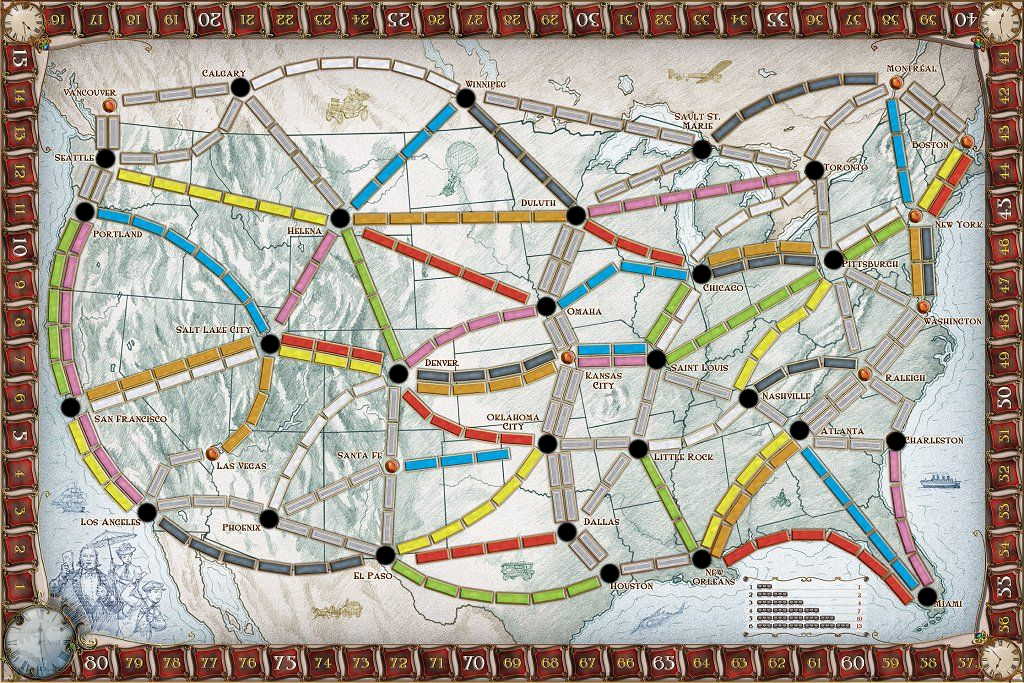

In [90]:
result = Image.open('TicketToRide1.png')
result

# Problem 2(There is no changes)

We habe an optimization problem

$$\begin{align}
\text{minimize}\hspace{12mm}c^Tx\\
\text{subject to}\hspace{5mm}Ax\leq b
\end{align}$$

This problem can be reformulated via indicator function

$$\begin{align}
\text{minimize}\hspace{5mm}c^Tx + \sum_{i=1}^mI_-(a_i^Tx-b_i)
\end{align}$$

where $I_-(u) = 0$ if $u\leq0$, $I_-(u)=\infty$ otherwise. This problem has an approximation via logarithmic barrier

$$\begin{align}
\text{minimize}\hspace{5mm}tc^Tx - \sum_{i=1}^m\log(b_i - a_i^Tx)
\end{align}$$

So, firstly we have to solve last optimization problem. Setting $\phi = - \sum_{i=1}^m\log(b_i - a_i^Tx)$ and $d_i = \frac{1}{b_i - a_i^Tx}$, we can see that (Boyd) we have the following optimization problem

$$\begin{align}
\text{minimize}\hspace{5mm}tc^Tx + \phi(x)
\end{align}$$

It can be easily seen that $\nabla\phi = A^Td$, $\nabla^2\phi = A^T\text{diag}^2(d)A$. So the last optimization problem can be solved by Newton method for function $\nabla(tc^Tx + \phi(x)) = tc^T + A^Td$ as follows

$$x_{k+1} = x_k - \left(A^T\text{diag}^2(d)A\right)^{-1}\cdot\left(tc^T + A^Td\right)$$

In [2]:
def newton(c, A, b, t, x0, tol=1e-10, n=2, maxiter=100000):
    current_x = x0
    iteration = 0
    alpha = 1.0 / t
   
    while  iteration <= maxiter:
        
        #Calculating d
        d = 1 / (b - A.dot(current_x))
        D = np.diag(d ** 2)
        
        #Calculating jacobian
        Jac = t * c + A.T.dot(d)
        
        #Calculating hessian
        Hess = A.T.dot(D.dot(A))
        
    
        if np.linalg.norm(np.linalg.det(Hess)) <= tol:
            break
        
        # step
        new_x = current_x - alpha * np.linalg.inv(Hess).dot(Jac)
        
        if np.linalg.norm(current_x - new_x) <= tol:
            break
        
        current_x = new_x
        iteration += 1
    return current_x

We choose $\frac{1}{t}$ as a step in Newton method.

In [40]:
# c = np.array([-1, -3])
# A = np.array([[2, 0],[0, 2]])
# b = np.array([1, 1])


# z1 = Variable(2)
# objective = Minimize(c.T * z1)
# constraints = [A * z1 <= b]
# prob = Problem(objective, constraints)
# print prob.solve()
# print z1.value

# t = 100
# z2 = Variable(2)
# objective = Minimize(t * c.T * z2 - 
#                      log(b[0] - A[0].T*z2) -
#                      log(b[1] - A[1].T*z2))
# Problem(objective).solve()
# print z2.value

C:\Users\Evgeny\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in less_equal


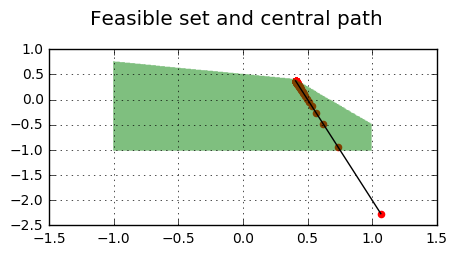

In [5]:
c = np.array([-1, -1])
A = np.array([[3, 2],[1, 4]])
b = np.array([2, 2])

x0 = np.zeros(2)
x = x0
solutions1 = []
solutions1.append(x0)
sol_x1, sol_y1 = [], []

for t in range(1, 100):
    solution = newton(c, A, b, t, x)
    x = solution
    solutions1.append(solution)
    sol_x1.append(solution[0])
    sol_y1.append(solution[1])
    
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]

x, y = np.where(A[0][0] * x + A[0][1] * y <= b[0], (x, y), np.nan)
x, y = np.where(A[1][0] * x + A[1][1] * y <= b[1], (x, y), np.nan)

feas_x1, feas_y1 = [], []
for i in range(200):
    for j in range(200):
        feas_x1.append(x[i][j])
        feas_y1.append(y[i][j])
        

#Plot        
fig = plt.figure(figsize=(5,5))
title = fig.suptitle('Feasible set and central path', fontsize="x-large")

feas = fig.add_subplot(211)
feas.grid(True)
feas.plot(feas_x1, feas_y1, 'g', alpha=.5)
feas.plot(sol_x1, sol_y1, color='black')
feas.scatter(sol_x1, sol_y1, color='red')

plt.show()

C:\Users\Evgeny\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in less_equal


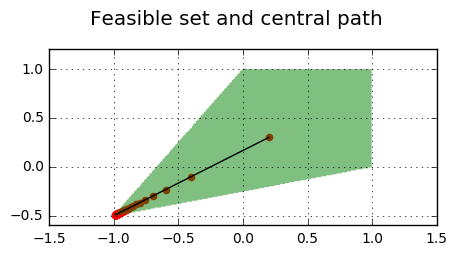

In [8]:
c = np.array([1, 1])
A = np.array([[-3, 2],[1, -4]])
b = np.array([2, 1])

x0 = np.zeros(2)
x = x0
solutions1 = []
solutions1.append(x0)
sol_x1, sol_y1 = [], []
for t in range(1, 100):
    solution = newton(c, A, b, t, x)
    x = solution
    solutions1.append(solution)
    sol_x1.append(solution[0])
    sol_y1.append(solution[1])
    
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]

x, y = np.where(A[0][0] * x + A[0][1] * y <= b[0], (x, y), np.nan)
x, y = np.where(A[1][0] * x + A[1][1] * y <= b[1], (x, y), np.nan)

feas_x1, feas_y1 = [], []
for i in range(200):
    for j in range(200):
        feas_x1.append(x[i][j])
        feas_y1.append(y[i][j])
        

#Plot        
fig = plt.figure(figsize=(5,5))
title = fig.suptitle('Feasible set and central path', fontsize="x-large")

feas = fig.add_subplot(211)
feas.grid(True)
feas.plot(feas_x1, feas_y1, 'g', alpha=.5)
feas.plot(sol_x1, sol_y1, color='black')
feas.scatter(sol_x1, sol_y1, color='red')

plt.show()

C:\Users\Evgeny\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in less_equal


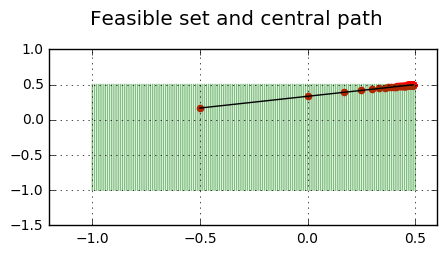

In [39]:
c = np.array([-1, -3])
A = np.array([[2, 0],[0, 2]])
b = np.array([1, 1])

x0 = np.zeros(2)
x = x0
solutions1 = []
solutions1.append(x0)
sol_x1, sol_y1 = [], []
for t in range(1, 100):
    solution = newton(c, A, b, t, x)
    x = solution
    solutions1.append(solution)
    sol_x1.append(solution[0])
    sol_y1.append(solution[1])
    
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]

x, y = np.where(A[0][0] * x + A[0][1] * y <= b[0], (x, y), np.nan)
x, y = np.where(A[1][0] * x + A[1][1] * y <= b[1], (x, y), np.nan)

feas_x1, feas_y1 = [], []
for i in range(200):
    for j in range(200):
        feas_x1.append(x[i][j])
        feas_y1.append(y[i][j])
        

#Plot        
fig = plt.figure(figsize=(5,5))
title = fig.suptitle('Feasible set and central path', fontsize="x-large")

feas = fig.add_subplot(211)
feas.grid(True)
feas.plot(feas_x1, feas_y1, 'g', alpha=.5)
feas.plot(sol_x1, sol_y1, color='black')
feas.scatter(sol_x1, sol_y1, color='red')

plt.show()